In [1]:
import pandas as pd
from pycaret.regression import *
from datetime import timedelta

df_eng = pd.read_excel("hoursPM_2_5\export-pm25_eng-1h.xlsx")
df_jsps018 = pd.read_excel("hoursPM_2_5\export-jsps018-1h.xlsx")
df_jsps014 = pd.read_excel("hoursPM_2_5\export-jsps014-1h.xlsx")
df_jsps013 = pd.read_excel("hoursPM_2_5\export-jsps013-1h.xlsx")
df = pd.concat([df_eng, df_jsps018, df_jsps014,df_jsps013], ignore_index=True)

In [9]:
df_bansai = pd.read_csv('bansai.h.csv')
df_chauatschool = pd.read_csv('chauatschool.h.csv')
df_jsps014 = pd.read_csv('jsps014.h.csv')
df_jsps013 = pd.read_csv('jsps013.h.csv')
df_jsps001 = pd.read_csv('jsps001.h.csv')
df_r002 = pd.read_csv('r202.h.csv')

In [23]:
df = pd.concat([df_bansai,df_chauatschool,df_jsps014,df_jsps013,df_jsps001,df_r002], ignore_index=True)

In [44]:
df.columns

Index(['humidity', 'pm_2_5', 'temperature', 'month', 'dayofweek', 'weekofyear',
       'day', 'hour', 'pm_2_5_lag_12day', 'PM2.5_MA3_prev_12day',
       'PM2.5_MAX24_prev_12day', 'PM2.5_MIN24_prev_12day'],
      dtype='object')

In [43]:
df = df.drop(columns=["Unnamed: 0"], errors='ignore')

In [45]:
df.tail(1)

,humidity,pm_2_5,temperature,month,dayofweek,weekofyear,day,hour,pm_2_5_lag_12day,PM2.5_MA3_prev_12day,PM2.5_MAX24_prev_12day,PM2.5_MIN24_prev_12day
103211,71.756008,38.166667,31.04933,6,2,178,26,16,13.55,22.145133,61.333333,2.294118


In [53]:
experiment_pm25 = setup(data=df, target="pm_2_5", train_size=0.80, session_id=42, fold=40, use_gpu=True )

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) UHD Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

,Description,Value
0,Session id,42
1,Target,pm_2_5
2,Target type,Regression
3,Original data shape,"(103212, 12)"
4,Transformed data shape,"(103212, 12)"
5,Transformed train set shape,"(82569, 12)"
6,Transformed test set shape,"(20643, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) UHD Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

In [27]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,3.2885,28.0226,5.2743,0.8354,0.3421,0.4122,3.4722
rf,Random Forest Regressor,3.5370,31.7155,5.6132,0.8136,0.3564,0.4209,9.7022
knn,K Neighbors Regressor,4.0201,42.7977,6.5227,0.7484,0.3892,0.4162,0.1972
dt,Decision Tree Regressor,4.5457,60.7278,7.7721,0.6422,0.4514,0.4387,0.9722
lightgbm,Light Gradient Boosting Machine,6.1701,69.2403,8.3123,0.5920,0.5636,0.9943,1.2602
gbr,Gradient Boosting Regressor,7.4502,97.7052,9.8759,0.4243,0.6564,1.4644,16.5358
lar,Least Angle Regression,8.9425,133.9730,11.5678,0.2102,0.7611,1.8974,0.0552
br,Bayesian Ridge,8.9425,133.9746,11.5679,0.2102,0.7611,1.8956,0.0670
ridge,Ridge Regression,8.9425,133.9733,11.5678,0.2102,0.7611,1.8964,0.0532
lr,Linear Regression,8.9425,133.9730,11.5678,0.2102,0.7611,1.8974,0.0605


ExtraTreesRegressor(n_jobs=-1, random_state=42)

In [54]:
pm25_Extra_Trees_Regressor = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.5956,44.3641,6.6606,0.7651,0.3628,0.5300
1,3.3898,26.6972,5.1669,0.8414,0.3615,0.6529
2,3.2377,22.6142,4.7554,0.8600,0.3431,0.3828
3,3.4457,30.8872,5.5576,0.8245,0.3571,0.3957
4,3.3169,33.6042,5.7969,0.8083,0.3404,0.3693
5,3.4460,27.5124,5.2452,0.8332,0.3733,0.4652
6,3.5258,43.1293,6.5673,0.7768,0.3551,0.3809
7,3.2924,27.7455,5.2674,0.8385,0.3593,0.4022
8,3.4209,29.8117,5.4600,0.8240,0.3711,0.5147


In [29]:
pm25_Extra_Trees_Regressor_n = create_model('et', min_samples_split=10, min_samples_leaf=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.3930,53.7058,7.3284,0.7156,0.4216,0.7128
1,4.2628,37.8828,6.1549,0.7749,0.4317,0.9281
2,4.1605,33.4969,5.7877,0.7926,0.4091,0.5065
3,4.3155,43.4651,6.5928,0.7530,0.4130,0.5035
4,4.2475,46.0573,6.7866,0.7372,0.4145,0.5228
5,4.2879,37.7733,6.1460,0.7711,0.4383,0.6773
6,4.4133,55.5201,7.4512,0.7127,0.4205,0.4993
7,4.0776,38.9412,6.2403,0.7734,0.4160,0.5232
8,4.3298,44.5202,6.6723,0.7372,0.4357,0.7097


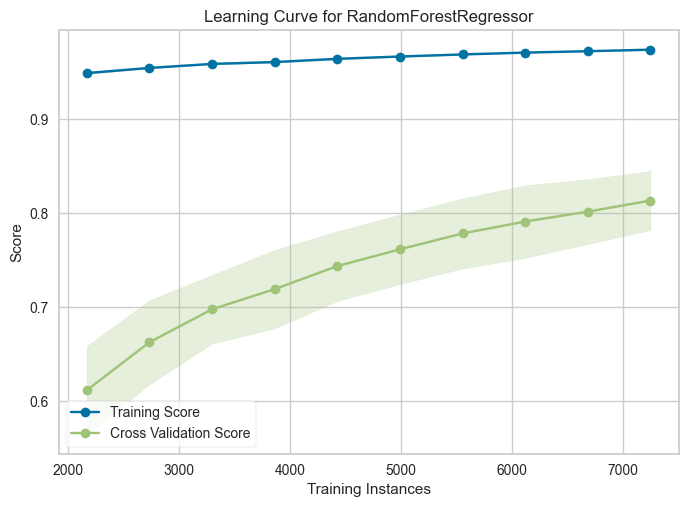

In [22]:
plot_model(pm25_Extra_Trees_Regressor, plot='learning')

In [58]:
save_model(pm25_Extra_Trees_Regressor, 'pm25_Extra_Trees_Regressor')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['humidity', 'temperature', 'month',
                                              'dayofweek', 'weekofyear', 'day',
                                              'hour', 'pm_2_5_lag_12day',
                                              'PM2.5_MA3_prev_12day',
                                              'PM2.5_MAX24_prev_12day',
                                              'PM2.5_MIN24_prev_12day'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('trained_model',
                  ExtraTreesRegressor(n_jobs=-1, random_state=42))]),
 'pm

In [38]:
save_model(pm25_Extra_Trees_Regressor_n, 'pm25_Extra_Trees_Regressor_n')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Unnamed: 0', 'humidity',
                                              'temperature', 'month',
                                              'dayofweek', 'weekofyear', 'day',
                                              'hour', 'pm_2_5_lag_12day',
                                              'PM2.5_MA3_prev_12day',
                                              'PM2.5_MAX24_prev_12day',
                                              'PM2.5_MIN24_prev_12day'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('trained_model',
              

In [56]:
loaded_Extra_Trees_Regressor = load_model('pm25_Extra_Trees_Regressor')

Transformation Pipeline and Model Successfully Loaded


In [57]:
predict = predict_model(loaded_Extra_Trees_Regressor,data=df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.6723,5.8439,2.4174,0.9655,0.1572,0.0862
